# 3. 2D Plotting and FITS images
Welcome to week 5 of KAS2020! In this session we'll talk about N-dimensional `arrays`, look at plotting 2D data, and discuss using and plotting data from a common astronomical format - the FITS image file.

## N-dimensional `arrays`
We briefly tounch on multi-dimensional arrays in the notebook `2_Pandas`, but it's worth repeating how they work as we will be using them throughout this notebook. We'll go over a few `numpy` functions and tricks while we're at it. If this is all old news to you, awesome, give it a read and get to the juicier problems at the end. If it's new to you, take the time to practrice it here. We'll start of by assembling a 2D array by hand:

In [10]:
import numpy as np
##Inputting n into 'arange' creates 
##an array from 0 up to n-1
a = np.arange(9)
print(a)
##let's print a line to separate the outputs
print('-------')
##Use the shape attribute to make 2D
a.shape = (3,3)
print(a)

[0 1 2 3 4 5 6 7 8]
-------
[[0 1 2]
 [3 4 5]
 [6 7 8]]


By setting the attribute `shape` to `(3,3)`, we change `a`into a 3$\,\times\,$3 `array`. Incidentally, `(3,3)` is another data type know as a `tuple`. Tuples consist of values, separated by commas `,`, surrounded by parentheses `()`. They seem similar to `lists` at first, but the major difference is that a tuple is 'immutable', which means you can't change the contents once you create it. `lists` are mutable because you can alter the contents.

We can access elements of the array just like a 1D array, but now we need two indexes to specify a location (kind of like an $x,y$ coordinate). Both axis are zero indexed, so we access the first element of the array like this `a[0,0]`.

If we think of the horizontal direction as `x`, and the vertical as `y`, the indexing works like this:

$$
\begin{array}{ccc} 
[[y_0,x_0 & y_0,x_1 & y_0,x_2] \\ 
[y_1,x_0 & y_1,x_1 & y_1,x_2] \\ 
[y_2,x_0 & y_2,x_1 & y_2,x_2]] \\ 
\end{array} 
$$

Where $y_1,x_0$ means you would mean access the element via `a[1,0]`. Importantly, the first index you enter is for the `y` axis. You can think of the dimension as having an 'order', where the $x$ dimension is the first order, and $y$ the second order dimension. When you go above 2 dimensions the dimensional index ordering goes like $n,n-1,\,...,\,1$ where $n$ is the number of dimensions. The same ordering applies when creating the shape of the `array`. Run the code below to get a feel for how this works.

In [11]:
b = np.arange(12)
b.shape = (4,3)
print(b)
print('Index 0,2 is element value',b[0,2])
print('Index 3,1 is element value',b[3,1])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
Index 0,2 is element value 2
Index 3,1 is element value 10


***
## <font color=blue>Exercise 3.1<font>
Create an array using `arange` that has 15 elements. Give it a shape where there are 5 elements in the horizontal direction, and 3 in the vertical. Write a print function that calls the element equal to 4, and another that calls the element equal to 11. Use the box below


In [91]:
five_by_three = arange(15)
five_by_three.shape = (3,5)
print(five_by_three)
print(five_by_three[0,4],"is equal to 4")
print(five_by_three[2,1],"is equal to 11")

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
4 is equal to 4
11 is equal to 11


***

### Slicing
It's often useful to access just certain parts of an array that we want to work on. An efficient way to do this is to 'slice' the array, which accesses multiple elements of the array simultaneously. Read and run the code below to look at slicing

In [12]:
a = np.arange(10)
print('Full array is',a)

##Slicing uses a semicolon in the indexing 
##adding n:m makes a subsection of the array
##starting at element n, up to element m-1

print('a[1:4] gives',a[1:4])
print('a[3:8] gives',a[3:8])

Full array is [0 1 2 3 4 5 6 7 8 9]
a[1:4] gives [1 2 3]
a[3:8] gives [3 4 5 6 7]


There are a couple of other quick slicing and indexing tricks. Check out the table below for some examples (where we use a 1D `array` called `a`. Try them out in the code box below

|Syntax| Effect|
|:-|:-|
|`a[n:]` | Access the elements from `n` up to the end of the array |
|`a[:n]` | Access the elements from the start of the array up to and including the element `n-1` |
|`a[-1]` | Access the very last element in the array |
|`a[::-1]`|Reverse the order of the elements in the array



## <font color=blue>Exercise 3.2<font>
You can slice in 2D as well! See if you can work out the syntax for how. First off, create an array called `awesome_array` which is a `(4,5)` `array` with elements like this:
    
```python
print(`awesome_array`)
```
```
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
```
then do a slice operation to access these elements
```
[[ 7  8  9]
 [12 13 14]]
 ```
`print` your answer to make sure it's correct.

In [86]:
awesome_array = arange(20)
awesome_array.shape = (4,5)
print(awesome_array[1:3,2:5])

[[ 7  8  9]
 [12 13 14]]


***
You can use slicing to assign new values to elements. You can either set multiple elements equal to a single value, or another `array` which is the same size as the slice you are making. Try the following code out:

In [13]:
import numpy as np

##zeros is a conveience function from numpy
##it creates an array of zeros in whatever shape you want
##the code below makes a 4x4 array of zeros
test_array = np.zeros((4,4))
print('This is the test array')
##The '\n' is a return carriage - starts a print on a new line
print(test_array,'\n')

##Set all the elements selected by the slice to 2
test_array[1:3,1:3] = 2
print("After setting some elements to 2")
print(test_array,'\n')

sub_array = np.array([1,2,3,4])
sub_array.shape = (2,2)

##Now set the same elements to the
##smaller array we just created
test_array[1:3,1:3] = sub_array

print("After setting the same elements to sub_array")
print(test_array,'\n')

This is the test array
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 

After setting some elements to 2
[[0. 0. 0. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 0. 0. 0.]] 

After setting the same elements to sub_array
[[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 3. 4. 0.]
 [0. 0. 0. 0.]] 



### Truth testing arrays
Logic testing works slightly differently on arrays, as they can have multiple elements. For example, imagine you had some basic data on a number of galaxies that said whether they were 'blue' or 'red', and their stellar mass $M_\odot$ (to keep things simple let's have 10 galaxies):

```python
colours = array(['red','red','blue','red','blue','blue','red','red','red','blue'])
masses = array([2.3e8,4.2e7,5.8e8,1.6e7,3.8e7,3.8e9,8.6e6,9.3e5,6.9e10,3.5e8])
```

Say you only wanted to access data from red galaxies. You can use the Comparison Operator to find where this condition is met, and return an array containing either `True` or `False`. These are the kind of operations that `pandas` is doing under the hood when you group your data. Try it below

In [14]:
##Some fake data
colours = np.array(['red','red','blue','red','blue','blue','red','red','red','blue'])
masses = np.array([2.3e8,4.2e7,5.8e8,1.6e7,3.8e7,3.8e9,8.6e6,9.3e5,6.9e10,3.5e8])

print(colours == 'red')

[ True  True False  True False False  True  True  True False]


Happily, you can actually access elements within an `array` using Booleans (`True` or `False` here). If you use an `array` of the same length as `colours`, containing `True` or `False`,  to access elements within `colours`, you only return the elements corresponding to `True`. Which means we can use the same logic test to call elements of another array, e.g. `masses`. Try the code below and make sure you understand what is happening here:

In [15]:
print('Full colours',colours)
print('Full masses',masses,'\n')

print('Only red',colours[colours == 'red'])
print('Masses of red galaxies',masses[colours == 'red'])

Full colours ['red' 'red' 'blue' 'red' 'blue' 'blue' 'red' 'red' 'red' 'blue']
Full masses [2.3e+08 4.2e+07 5.8e+08 1.6e+07 3.8e+07 3.8e+09 8.6e+06 9.3e+05 6.9e+10
 3.5e+08] 

Only red ['red' 'red' 'red' 'red' 'red' 'red']
Masses of red galaxies [2.3e+08 4.2e+07 1.6e+07 8.6e+06 9.3e+05 6.9e+10]


There is a nice little trick that allows you to apply multiple criteria as the same time. Imagine you want to select all the red galaxies that are also over $10^9_\odot$. You can do that with the following syntax:
```python
masses[(colours == 'red') & (masses > 1e9)]
```
The important thing to note here is the parentheses `()` around each logic test - *without them this won't work*. Don't worry for now about why - but by added the `()`, and combining the logic tests with the ampersand `&`, you can add multiple logic tests. Try running it below and check the result against the original data to see if it makes sense.


In [16]:
print(masses[(colours == 'red') & (masses > 1e9)])

[6.9e+10]


***
## <font color=blue>Exercise 3.3<font>
There is a useful function for generating $x$ and $y$ coordinates in 2D arrays called `meshgrid`. Imagine you wanted to create a 5$\times$5 `array` with $x$ and $y$ coordinates that ranged from -2 to 2 inclusive. You could use `meshgrid` like so:

```python
x_range = np.arange(-2,3)
y_range = np.arange(-2,3)

x_mesh,y_mesh = np.meshgrid(x_range,y_range)

print(x_mesh,'\n')
print(y_mesh)
```
```
[[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]] 

[[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]
```

So x_mesh is now a 5$\times$5 `array` that contains the `x` coordinates that we want to associate with an output array.

Use the `meshgrid` functionality to define a `function` that can create a simple 'circle' array, like the below. This is a 13$\times$13 array of zeros, with a 'circle' of ones within that has a radius of 5. Complete the code below to create this output. You may want to make use of the `numpy.sqrt` function, which finds the square root of a number or `array`, and remember for a circle, $x^2 + y^2 = r^2$.

```
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
```

In [96]:
##Finish off this function
def make_circle(radius,grid_size):
    ##Don't forget to add a doc string
    
    ##Setup a sensible range for x and y, and then
    ##meshgrid them to get coordinates
    
    extent = grid_size // 2
    
    x_range = np.arange(-extent,grid_size-extent)
    y_range = np.arange(-extent,grid_size-extent)
    x_mesh, y_mesh = np.meshgrid(x_range, y_range)
    
    ##Make a circle array that matches the one shown above,
    ##using x_mesh and y_mesh
    ##This doesn't has to happen in one line
    circle = np.zeros((grid_size, grid_size))
    
    circle[x_mesh**2 + y_mesh**2 <= radius**2] = 1.0
        
    return circle

grid_size = 13
radius = 5
circle = make_circle(radius,grid_size)

print(circle)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Plotting in 2D
We made a circle, but it doesn't look great just printed out. Let's plot it in 2D! I'm going to take this opportunity to introduce some general plotting tips - read the comments, understand the code, and then run the code below to see your plot. You can use this plotting code in the future, and adapt it to your needs. There are *lots* of plotting examples online (an example is [here](https://matplotlib.org/2.0.0/examples/pylab_examples/subplots_demo.html)).

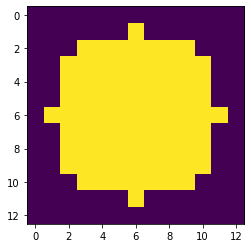

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

##Make our 2D circle array
circle = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

##The imshow method plots things in 2D
##We use the imshow method to return image
##We can use image to plot a colorbar
image = plt.imshow(circle)

##This adds a colorbar - the colorbar
##explains the relationship between the
##colour scale and the values it represents
fig.colorbar(image)

plt.show()

Sweet! That's a cool looking plot, and it only took us three lines to load the data.

## <font color=blue> Exercise 3.4 <font>
In the `Plotting` folder there is a text file `cool_image.txt`. Read in the data in this file using `np.genfromtxt`, and plot it using `ax.imshow` like the code in the previous boxes. Use the box below to write the code.
<font color=red>Optional extension <font> - change the colour map of the plot to get a black and white plot (hint google the `cmap` keyword for `imshow`.)

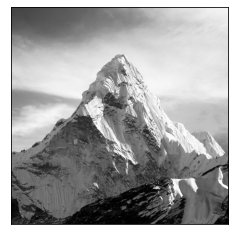

In [31]:
##Read in the data
data = np.genfromtxt('cool_image.txt')

##Plot the data in black and white
plt.imshow(data,cmap='Greys')

##Get rid of axis labels as they mean nothing here
plt.xticks([])
plt.yticks([])

plt.show()

## FITS files
Astronomical images are usually stored in FITS files. Before, we looked at FITS tables, which are a different variant. Here we'll look at FITS images. Opening up the FITS file and understanding the data inside can be a bit of a dark art, as different sofware leave differnet keywords in headers. There is a large amount of online documentation  [here](http://docs.astropy.org/en/stable/io/fits/index.html?highlight=FITS) to check out.

Inside the `Plotting` folder you can find 'NGC_1316_I_20cm_fev1989_i.fits' which is a FITS image file. I found this FITS file by searching on the NASA/IPAC Extragalactic Database (NED - see [here](http://ned.ipac.caltech.edu/ui/?q=imageservice&objname=fornax%20A)). The image came from this research [here](http://adsabs.harvard.edu/cgi-bin/bib_query?1989ApJ...346L..17F). First off, we open the file, `print` out some information about the file, and grab some data.

In [52]:
##We use the fits class inside astropy
from astropy.io import fits

with fits.open('NGC_1316_I_20cm_fev1989_i.fits') as hdus:
    ##We use the open method in fits to read in data from
    ##the fits file
    print(hdus.info())
    
    ##Because you can have more than one hdu, hdus is actually a list
    ##To acces the first (and only) hdu, use hdus[0]
    hdu1 = hdus[0]
    
    ##The data inside hdu1 is an attribute called data
    data = hdu1.data

Filename: NGC_1316_I_20cm_fev1989_i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     124   (512, 512, 1, 1)   int16 (rescales to float32)   
None


> Wait, what's up with `with`? In many other computer languages, memory is handled explicitly as part of the syntax. This is one of the notoiously difficult things in a lanugauge like `C` to get correct. `python` is lovely because is essentially does it all for you, talking to the computer automagically saying things like _"this is a float, and it lives here, it needs this much memory"_ etc. Unfortunately, this also means you never really know what it's doing half the time. So when opening something potentially large or complicated like a FITS file, using the `with` command here says _"OK `python`, do your magic and open up this FITS file, and assign some parts of it to an array called `data`. Once we pop out of the indented whitespace below `with`, however, clean up after yourself, closing the `hdus` object and freeing all the memory associated with that."_ This is a nice, clean way of ensuring you don't have things hanging around in buffer that you don't need.

OK, so there's a large of information. HDU means Header Data Unit, which is the highest level component of the FITS file structure. You can have multiple HDUs in a single FITS file - in this example we only have one. Most important here is the 'Dimensions' Column, which shows `(512, 512, 1, 1)`. This means we have data of that shape, so a 4-dimensional data set. Often FITS files come with multiple frequency slices, so even though we are going to plot a 2D image, there a 4 Dimensions to the data. So what shape is our data?

In [53]:
print(data.shape)

(1, 1, 512, 512)


Note that the dimensions of the data are reported by `astropy` in the opposite order to that in the FITS file. This is annoying but unavoidable. We can use the data `array` to do any kind of science we want with this galaxy - find the maximum brightness, the rms across the galaxy, all kinds of stuff. For now we're just going to plot it.  Now, finally, we'll pull out the relevant data and plot it with `imshow`.

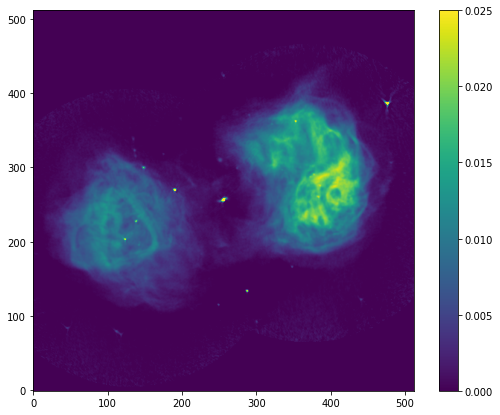

In [46]:
##OK, we want to plot a 2D array, so we slice data
##to make it 2D
slice_data = data[0,0,:,:]

##Now we plot and succeed
import matplotlib.pyplot as plt

##This creates a matplotlib figure object
##We will create our plot within this
##The figsize let's you control how large
##the figure is, in order (x,y)
fig = plt.figure(figsize=(9,7))

##This add an axis object - we add it to the figure
##You can control how many subplots to add with
##the numbers - here we want the first axis of a
##one by one grid - so we just pass three 1s.
ax = fig.add_subplot(111)

##The imshow method plots things in 2D
##We use the imshow method to return image
##We can use image to plot a colorbar
##vmin and vmax set the lower and upper
##bounds of the colour scale
##we add origin='lower' because numpy arrays have a zero
##top left - FITS files have 0 bottom left, so we need
##to flip the image
image = ax.imshow(slice_data,vmin=0,vmax=0.025,origin='lower')

##the last three commands can just be acheived 
##by the following command:

##image = plt.imshow(slice_data,vmin=0,vmax=0.025,origin='lower')

##From personal experience however, I find you can get
##finer control over the final plot by explicitly
##created the figure and axes, especially if you are plotting
##multiple axes on the same figure. Feel free to plot
##whichever way you want. Live your best life

##This adds a colorbar - the colorbar
##explains the relationship between the
##colour scale and the values it represents
##Getting in the habit of specifing which ax
##to plot the colour
fig.colorbar(image, ax=ax)

plt.show()

Oooooo lovely radio galaxy. Say you want to compare two images side by side, with similar plotting techniques. What's an efficient way of doing that? Define a function! Here we'll plot two simulations I ran in this work: [Shapelets paper](https://ui.adsabs.harvard.edu/abs/2020PASA...37...27L/abstract). Let's have look:

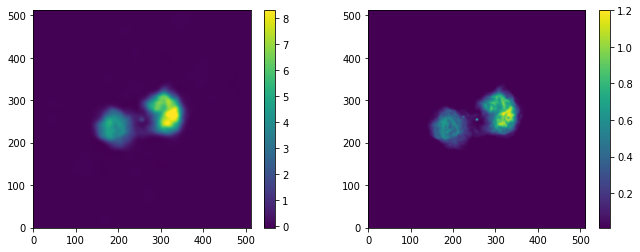

In [64]:
def do_a_plot(filename, fig, ax, vmin, vmax):
    '''
    Given a path to a 4D FITS file (filename)
    and a matplotlib fig and ax instance, plot
    the contents of the FITS file with the given
    vmin, vmax constraints
    '''
    with fits.open(filename) as hdu:
        ##Before we broke accessing the hdu and slicing
        ##the data into multiple lines to be clear. You
        ##can actually just do it in one line!
        slice_data = hdu[0].data[0,0,:,:]
        
        
    image = ax.imshow(slice_data,vmin=vmin,vmax=vmax,origin='lower')
    fig.colorbar(image, ax=ax)
    

##This is a handy shortcut command in matplotlib.
##It creates a figure instance, and a number of
##axes instaces on that figure, depending on what
##arguments you pass. Here we say "2 plots in the
##horizontal, one in the vertical". The axes are
##returned in a list, which we call axs here
fig, axs = plt.subplots(1,2,figsize=(11,4))


do_a_plot('woden_VLA-ForA-MFS-image.fits', fig, axs[0], -0.05, 8.3)
do_a_plot('woden_VLA-ForA_phase1+2-MFS-image.fits', fig, axs[1], 0.01,1.2)


## <font color=blue> Exercise 3.5 </font>
These plots are a little messy still though. The pixel labels don't really tell us much, and we don't know what units the plot is in. Furthermore, there is too much blank space around the edge. By adapting the code above, using the box below, get rid of the x/y labels, add a label that says `Jy/beam` to the colorbar (google to find the keyword needed), and modify the slice to git rid of the space around the edges. You plot should end up looking like this:
    
![side_by_side_FornaxA.png](side_by_side_FornaxA.png)

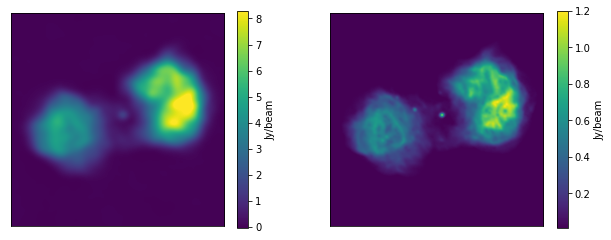

In [72]:
def do_a_plot(filename, fig, ax, vmin, vmax):
    '''
    Given a path to a 4D FITS file (filename)
    and a matplotlib fig and ax instance, plot
    the contents of the FITS file with the given
    vmin, vmax constraints
    '''
    with fits.open(filename) as hdu:
        ##Before we broke accessing the hdu and slicing
        ##the data into multiple lines to be clear. You
        ##can actually just do it in one line!
        slice_data = hdu[0].data[0,0,125:375,125:375]
        
        
    image = ax.imshow(slice_data,vmin=vmin,vmax=vmax,origin='lower')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    fig.colorbar(image, ax=ax,label='Jy/beam')
    

##This is a handy shortcut command in matplotlib.
##It creates a figure instance, and a number of
##axes instaces on that figure, depending on what
##arguments you pass. Here we say "2 plots in the
##horizontal, one in the vertical". The axes are
##returned in a list, which we call axs here
fig, axs = plt.subplots(1,2,figsize=(10.5,4))


do_a_plot('woden_VLA-ForA-MFS-image.fits', fig, axs[0], -0.05, 8.3)
do_a_plot('woden_VLA-ForA_phase1+2-MFS-image.fits', fig, axs[1], 0.01,1.2)

fig.savefig('side_by_side_FornaxA.png',bbox_inches='tight')

## `aplpy`

Right, there are a million ways to make this plot look better. One of the trickiest things to do with plotting a FITS image is to correctly labels the RA and Dec axis. There is a nice package out there already, called `aplpy`, that does many of these things neatly for you (see installation notes [here](https://aplpy.github.io/install.html). It can however be difficult to get `aplpy` to play nicely with your exact version of `numpy` and `matplotlib`, so far warning in advance. Once it works however, you can make publication-quality plots with it.

I've already run the code below in case you have issues installing `aplpy`. Ask your tutor for help if you run into problems. Hopefully you'll agree this plot is far clearer, more attractive, and includes the RA and Dec coordinate information. `aplpy` even managed to understand that this data is ooooold, so it's stored in `B1950` RA,Dec coords, rather than the more modern `J2000` standard we use today.

INFO: Setting slices=[0, 0] [aplpy.core]


Changed DATE-OBS from '07/10/86' to '1986-10-07''. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -2.900e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.331e-02 [aplpy.core]


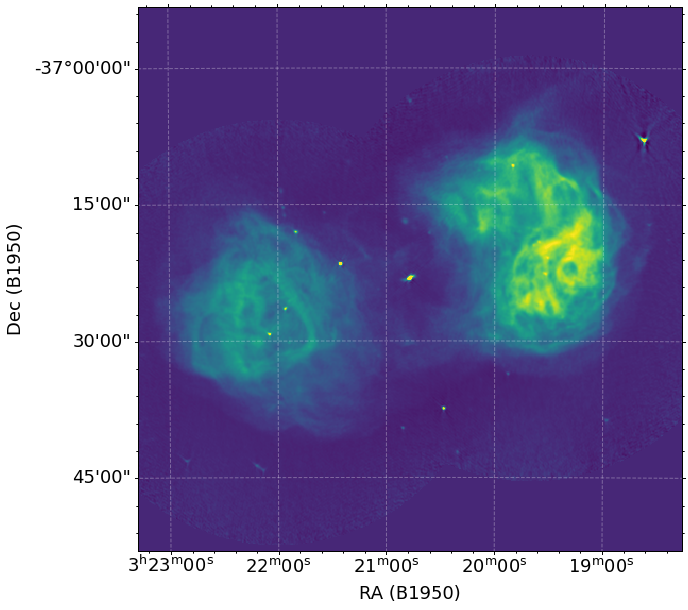

In [73]:
import aplpy
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

##this creates an alply axis instance which I called f
f = aplpy.FITSFigure('NGC_1316_I_20cm_fev1989_i.fits',figure=fig)

##this is kind of like imshow - it add the plot, with
##a colour scheme of your choice
f.show_colorscale(cmap='viridis')

##this adds a grid to the plot which can be helpful
f.add_grid()
f.grid.set_linewidth(1.0)
f.grid.set_linestyle('dashed')
f.grid.set_alpha(0.3)
f.grid.show()

##fiddle the size and format of the labels to make
##them look nice
f.axis_labels.set_font(size=18)
f.tick_labels.set_font(size=18)
f.tick_labels.set_xformat('hh:mm:ss')
f.tick_labels.set_yformat('dd:mm:ss')

plt.show()
fig.savefig("nice_fornaxA_plot.png",bbox_inches='tight')


## <font color=blue> Exercise 3.6 </font>
Adapt your side by side code above to use `aplpy` instead of `matplotlib`. This will likely involve a decent amount of googling to work out how to get multiple `aplpy.FITSFigure` onto the same figure.


INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


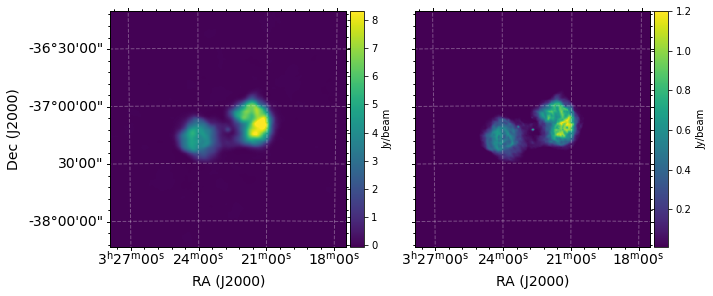

In [85]:
def do_an_aplpy_plot(filename, fig, subplot, vmin, vmax, hidey=False):
    '''
    Given a path to a 4D FITS file (filename)
    and a matplotlib fig and ax instance, plot
    the contents of the FITS file with the given
    vmin, vmax constraints
    '''
    ##this creates an alply axis instance which I called f
    f = aplpy.FITSFigure(filename,figure=fig, subplot=subplot)

    ##this is kind of like imshow - it add the plot, with
    ##a colour scheme of your choice
    f.show_colorscale(cmap='viridis',vmin=vmin,vmax=vmax)

    ##this adds a grid to the plot which can be helpful
    f.add_grid()
    f.grid.set_linewidth(1.0)
    f.grid.set_linestyle('dashed')
    f.grid.set_alpha(0.3)
    f.grid.show()

    ##fiddle the size and format of the labels to make
    ##them look nice
    f.axis_labels.set_font(size=14)
    f.tick_labels.set_font(size=14)
    f.tick_labels.set_xformat('hh:mm:ss')
    f.tick_labels.set_yformat('dd:mm:ss')
    
    ##Don't need the Dec label twice, as it takes up
    ##uneccessary space, so hide it on the right
    if hidey:
        f.axis_labels.hide_y()
        f.tick_labels.hide_y()
    
    f.add_colorbar()
    f.colorbar.show()
    f.colorbar.set_axis_label_text('Jy/beam')

##This is a handy shortcut command in matplotlib.
##It creates a figure instance, and a number of
##axes instaces on that figure, depending on what
##arguments you pass. Here we say "2 plots in the
##horizontal, one in the vertical". The axes are
##returned in a list, which we call axs here
fig = plt.figure(figsize=(10,5))


do_an_aplpy_plot('woden_VLA-ForA-MFS-image.fits', fig, (1,2,1), -0.05, 8.3)
do_an_aplpy_plot('woden_VLA-ForA_phase1+2-MFS-image.fits', fig, (1,2,2), 0.01,1.2,hidey=True)

#fig.savefig('aplpy_side_by_side_FornaxA.png',bbox_inches='tight')
plt.show()